 # GRIP: The Sparks Foundation- Data Science and Buisness Analytics Internship

# Task 2: Prediction Using Unsupervised Machine Learning . 

## Author: Rutuja Shete

**PROBLEM STATEMENT :**

* From the given "Iris" datatset we have to predict the optimum number of clusters (k) and represent it visually.
* Iris is a multivariate dataset which has five attributes
* Dataset Link: https://bit.ly/3kXTdox

# Step 1: Import all the recquired libraries

In [47]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [48]:
# To ignore the warnings
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Step 2 : Import Dataset

In [60]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step3: Exploratory Data Analysis


* Get usefull insights from a Dataset

In [61]:
# observe the dataset
print("Rows:",data.shape[0])
print("Columns:",data.shape[1]) 

Rows: 150
Columns: 6


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* The info function gives the quick idea about dataset. here, the information contains no. of columns, column labels, column data types, null values,etc.

In [63]:
#Summary of statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
# Checking for Null-Value in dataset.
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [65]:
# To check what unique species we have 
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Step 4: Finding the optimum numbers of clusters

* Before clustering the data using k-means, we need to specify the number of clusters.
* In order to find the optimum number of clusters, there are various methods available. Here we are going to use the elbow method.
* The Elbow Method : In this method, the number of clusters are varies within a certain range. for each number, within-cluster sum of square (wss) value is calculated and stored in a list.These values are then plotted against the range of number of clusters used before.
* The location of bend in the 2nd plot indicates the appropriate no. of clusters.

In [71]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [1, 2, 3, 4]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

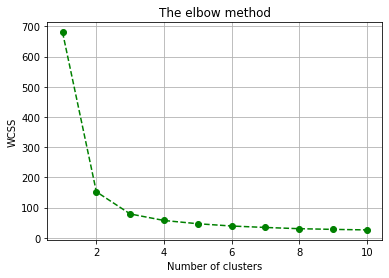

In [72]:
# Plotting the results onto a line graph,  `allowing us to observe 'The elbow'
# Plotting the within-cluster sum of square against the cluster range.

plt.plot(range(1, 11), wcss,'go--',color="green")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

* Here we can clearly see the elbow shaped graph, in which optimum cluster is where the elbow occurs .
* this is when the wcss doesn't decrease significantly with every iteration.
* **Conclusion :** optimum numbers of clusters is 3.

# Step 5: Creating The K-Means Classifier

In [73]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Step 6: Visualizing the Clusters

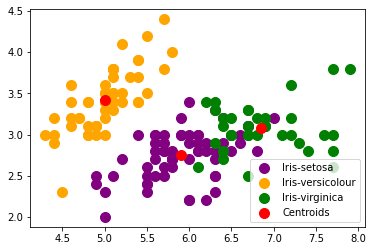

In [75]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

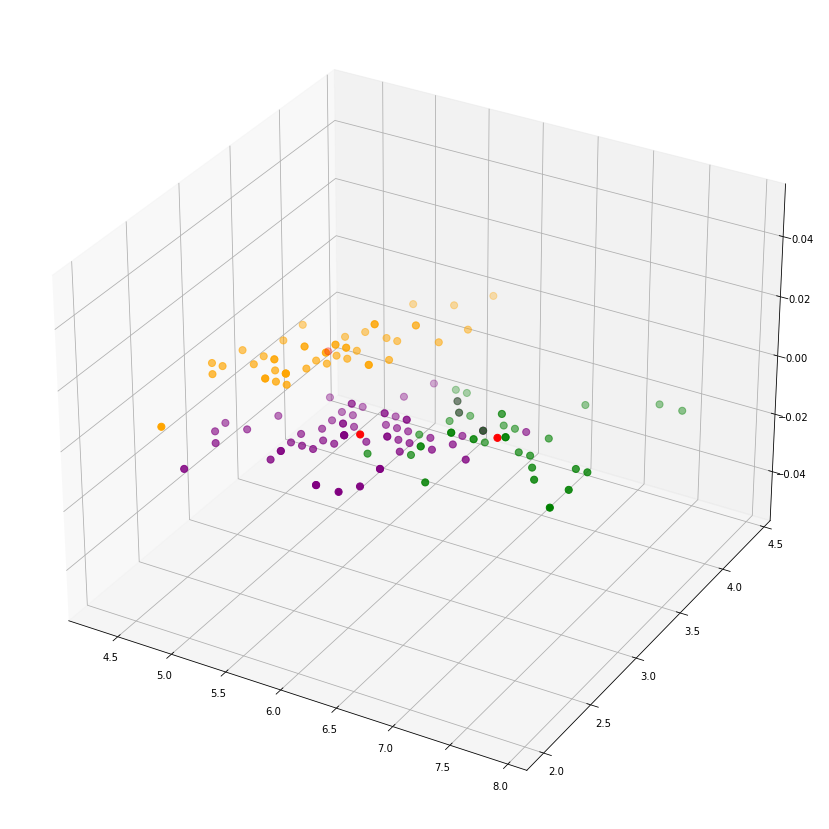

In [74]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.show()

# Step 7: Labeling the predictions

In [77]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

# Step 8: Adding the prediction to the dataset

In [78]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


# Step 9: Barplot - CLUSTER DISTRIBUTION

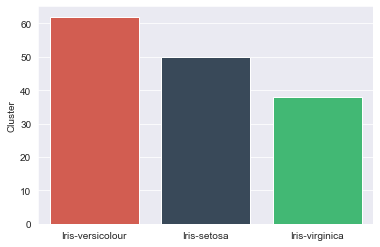

In [79]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));

* Inference : There are around 62 iris-versicolour , 50 Iris-virginica and roughly 38 Iris-setosa samples in the dataset as predicted.

# Pairplot

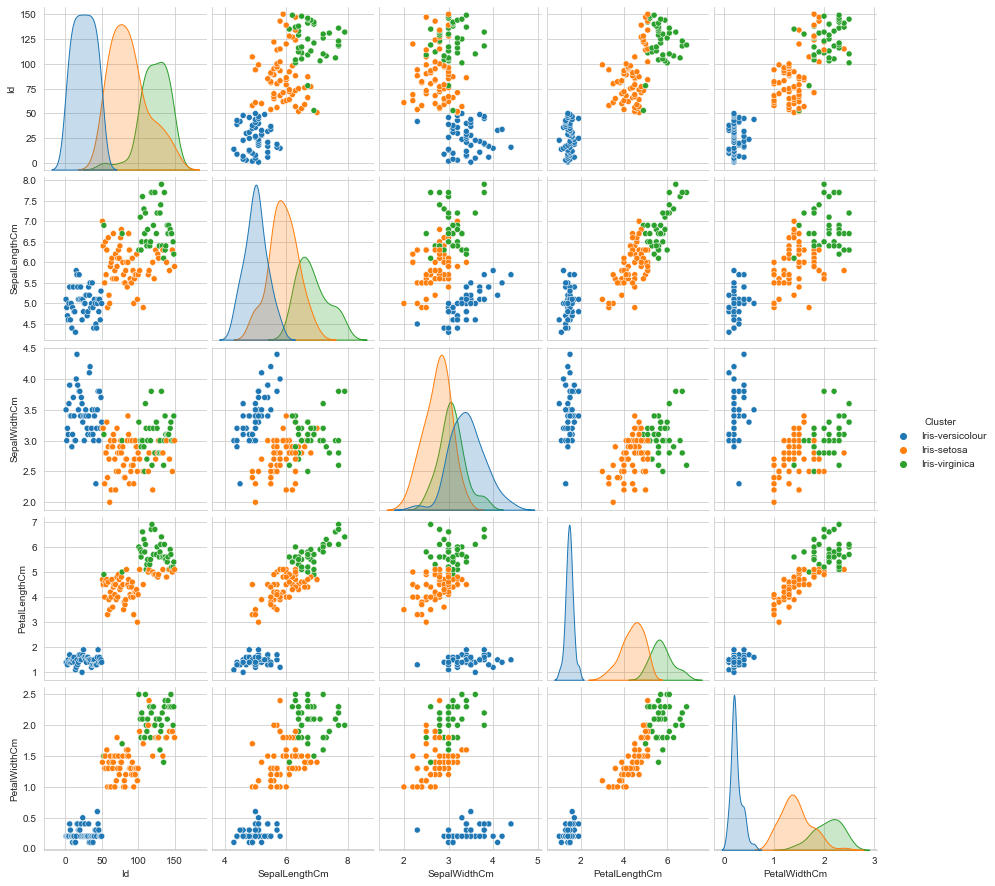

In [80]:
### hue = species colours plot as per species
### It will give 3 colours in the plot

sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster');

* **PairPlot insights**
* petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship).
* Iris-Setosa seems to have smaller petal length and petal width as compared to others.
* Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.


# THANK YOU!